In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
dtype = np.dtype('float')
path = "../LOFAR_2e_jaars_RP_2022_voor_studenten/Data_Pulsar1/L197621_SAP0_BEAM1_DM12.44_mask.dat"
with open( path, 'rb') as f:
    pulsar_data = np.fromfile(f, dtype)
pulsar_data

array([6.97620138e+46, 6.50841276e+46, 6.53733840e+46, ...,
       1.17707714e+47, 1.17707714e+47, 1.17707714e+47])

In [30]:
len(pulsar_data)

34560

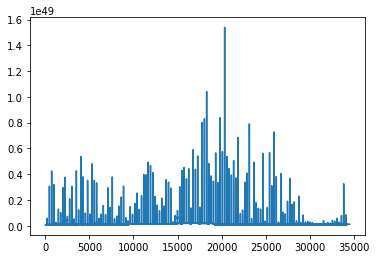

In [31]:
plt.plot(pulsar_data)

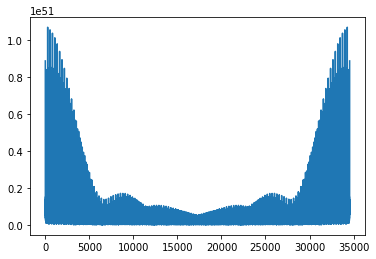

In [35]:
transform = np.fft.fft(pulsar_data)
%matplotlib inline
plt.plot(abs(transform[1:]))